In [1]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
fake_df = pd.read_csv("/Users/abdelrhman/Downloads/Fake News/Fake.csv")
true_df = pd.read_csv("/Users/abdelrhman/Downloads/Fake News/True.csv")

print(f"📂 Fake: {len(fake_df)} خبر")
print(f"📂 True: {len(true_df)} خبر")


# 3️⃣ دمج الأخبار الجديدة
fake_df = pd.concat([fake_df, pd.DataFrame(fake_data)], ignore_index=True)
true_df = pd.concat([true_df, pd.DataFrame(real_data)], ignore_index=True)

# إزالة التكرارات
fake_df.drop_duplicates(inplace=True)
true_df.drop_duplicates(inplace=True)

# حفظ الملفات المحدثة
fake_df.to_csv("/Users/abdelrhman/Downloads/Fake News/Fake.csv", index=False)
true_df.to_csv("/Users/abdelrhman/Downloads/Fake News/True.csv", index=False)

print(f"✅ Fake بعد الإضافة: {len(fake_df)} خبر")
print(f"✅ True بعد الإضافة: {len(true_df)} خبر")

📂 Fake قبل الإضافة: 23483 خبر
📂 True قبل الإضافة: 21217 خبر
✅ Fake بعد الإضافة: 23483 خبر
✅ True بعد الإضافة: 21217 خبر


In [39]:
# 4️⃣ تجهيز البيانات للتدريب
fake_df['label'] = 0
true_df['label'] = 1
df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)

# تنظيف النصوص
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text.strip()

df['text'] = (df['title'] + " " + df['text']).apply(clean_text)

In [41]:
# 5️⃣ تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# 6️⃣ تحويل النصوص إلى أرقام
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [43]:
# 7️⃣ تدريب النموذج
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# 8️⃣ التقييم
y_pred = model.predict(X_test_tfidf)
print(f"\n🎯 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy: 0.9862

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4719
           1       0.98      0.99      0.99      4221

    accuracy                           0.99      8940
   macro avg       0.99      0.99      0.99      8940
weighted avg       0.99      0.99      0.99      8940



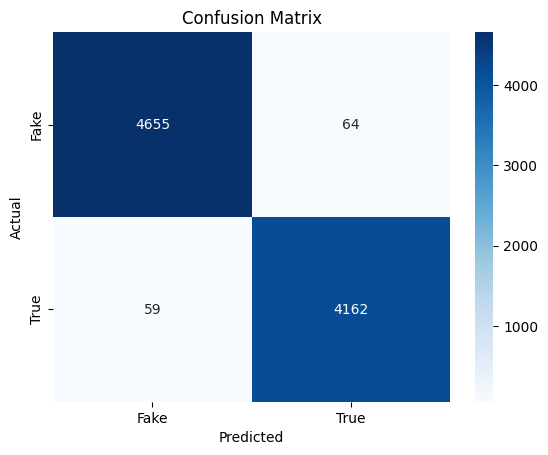

In [45]:
# 9️⃣ مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# 📰 أخبار للاختبار
test_news = [
    {
        "title": "Palestine Rightfully Belongs to the Palestinian People, Not Israel", "text": "International human rights organizations reaffirm that Palestine is the rightful homeland of the Palestinian people, rejecting any claims of Israeli sovereignty over the land."
    },
    {
        "title": "Palestinian President Resigns Over Secret Peace Deal",
        "text": "A viral post alleged that the Palestinian president resigned after signing a secret peace agreement with Israel, but no such agreement or resignation occurred according to official Palestinian sources."
    },
    {
        "title": "UN Calls for Immediate Ceasefire in Gaza",
        "text": "The United Nations Security Council issued a statement urging all parties to agree to an immediate ceasefire in Gaza to prevent further civilian casualties. Source: BBC News."
    },
    
]

# دمج العنوان مع النص وتنظيفهم
test_df = pd.DataFrame(test_news)
test_df['text'] = test_df['title'] + " " + test_df['text']
test_df['text'] = test_df['text'].apply(clean_text)  # استخدم دالة التنظيف اللي عرفناها قبل

# تحويل النصوص إلى تمثيل رقمي باستخدام نفس الـ vectorizer
X_test_custom = vectorizer.transform(test_df['text'])

# التنبؤ
predictions = model.predict(X_test_custom)

# عرض النتيجة
for i, pred in enumerate(predictions):
    label = "True" if pred == 1 else "Fake"
    print(f"News {i+1}: {label}")


News 1: Fake
News 2: Fake
News 3: True


In [55]:
import joblib

# حفظ المودل
joblib.dump(model, "fake_news_model.pkl")

# حفظ الـ TF-IDF vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']